# Juliaで動かす金融計算-株価のシミュレーション

さて, 乱数を使っていよいよ金融らしいことをやっていきましょう.  
ここでは, 乱数を使って株価のシミュレーションをやっていきます.

## 株価のシミュレーションの準備


株価のシミュレーションを行うわけですが, そのためには **どのように株価が変動するか** ということを決めておかなければなりません.  
これを **株価の「モデル」を決める** なんて言ったりします.  
金融の世界では株価の変動について, 様々なモデルがありますが, ここでは株価の変動を
$$
    株価の変動 = 確定的な変動 + 確率的な変動
$$
と分けて考えてみたいと思います.  
株価の変動を下記のように分けてみるわけですね.  
 ![stock_price_diff_decompositioin.png](../Figs/stock_price_diff_decompositioin.png)

では, 「具体的にそれぞれの変動をどう計算するのか」という点について, 説明していきましょう.  

### 確定的な変動について

確定的な変動の部分については, 以下のように計算することにしましょう.  
$$
    確定的な変動 = \underbrace{期待収益率 \times 時間の刻み幅}_{=現在の株価に対する平均リターン分} \times 現在の株価
$$
式でみると何をやっているかよくわからないかもしれませんが, 要するに **「確定的な変動⇒平均リターン分」** だということです.  
では, これをコードを書いてみましょう.  


``` Julia
#μは\mu⇒Tabキーで, Δは\Delta⇒Tabキーで出せます.
#μ：期待収益率, Δtは時間の刻み幅, Sは現在の株価です.
constantDiff = μ * Δt * S
```

これで, 確定的な変動を計算する部分が作れました.  
次に確率的な変動を計算してみましょう.

### 確率的な変動について
さて, ここからが本講座の正念場である確率的な変動の計算です.  
といっても, 計算方法の概形は確定的な変動とあまり変わりません.  
確率的な変動は以下のように計算することにしましょう.  
$$
\begin{align*}
    &確率的な変動 = \underbrace{ボラティリティ \times 乱数}_{=現在の株価に対するランダムの部分} \times 現在の株価 \\
    &（乱数は平均0, 分散が時間の刻み幅である正規分布から生成したもの）
\end{align*}
$$
ここで出てくるボラティリティというのは, 確率的な変動の大きさを司るものです.  
確率的な変動についても難しく考える必要はありません. 結局は **「確率的な変動⇒現在の株価に対するランダムの部分」** です.  
問題になるのは乱数の部分かと思いますが, これについては既にやりましたね.  
注意する点としては, 分散が時間の刻み幅（=`Δt`）なので, 標準偏差はその0.5乗である`Δt^0.5`である点です.  
なぜこんな変な分散の設定をするのか？という至極真っ当な疑問を持つかもしれません.  
これについては数学的な背景があるのですが, それについて説明すると大変なので, まぁそういうものかと思ってください.   
さぁ, コードを書いてみましょう.  

``` Julia
using  Distributions #確率分布を計算するためのパッケージを宣言

d = Normal(0, Δt^0.5) #正規分布を生成
w = rand(d) #1個だけ乱数を生成するのでこれでOK
radomDiff = σ * w * S #σは\sigma⇒Tabキーで出せます
```

## 時間の実装

株価は, 時間とともに移りゆくものなので, 当然時間についても考えておく必要があります.  
といってもそんなに難しく考える必要はありません.  
`Julia`なら1行で作ることができるからです.  
以下実装（？）です.

``` Julia
t = 0:Δt:T #Δt刻みで, 0からTまでの時間を生成する
```

## 株価のシミュレーションを実装

さて, 今までやってきたことを組み合わせて, 株価のシミュレーションを行いましょう.  
株価のシミュレーションは以下の流れで行います.  

1. 各定数を設定する
1. 時間を作る
1. 正規分布を作る
1. 初期条件を設定
1. 株価を作る
1. プロット

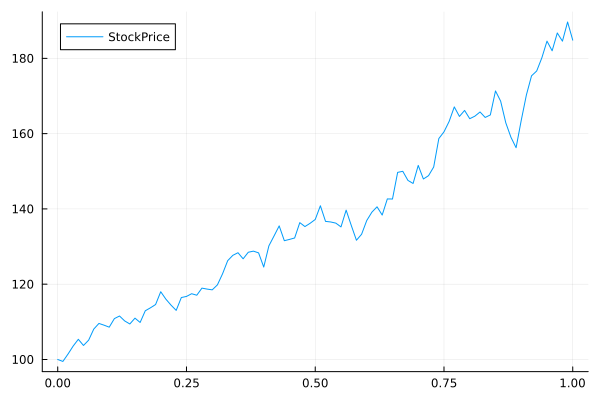

In [13]:
using Distributions
using StatsPlots

function SimulateStockPrice()
    #1.定数の設定
    T = 1
    Δt = 0.01
    μ = 0.5
    σ = 0.2
    S0 = 100.0#初期株価

    #2.時間の生成
    t = 0:Δt:T

    #3.正規分布を生成
    d = Normal(0, Δt^0.5)

    #4.初期設定
    S = [S0]

    #4.時間ごとに株価を生成
    for t_i in t[2:end]
        constantDiff = μ * Δt * S[end] #確定的な変動
        w = rand(d) #乱数生成
        randomDiff = σ * w * S[end] #ランダムな変動
        nextS = S[end] + constantDiff  + randomDiff #次の株価を計算
        push!(S, nextS) #次の株価を配列に格納
    end

    #5.プロット
    plot(t, S, label = "StockPrice")
end

SimulateStockPrice()

ちょっとわかりにくい点があるとすれば, `t[2:end]`のところかと思います.  
これは以下のように, 一番最初は既に作っているので, 2番目から始めるという意味です.  

|インデックス|`t`|`S`||
|:--|:--|:--|:--|
|1|0|100|←`for`文の外で作成済み|
|2|`Δt`|100 + 変動分|←ここからループして作る|
|...|...|...||
|`end`|`T`|`S[end]`|←これを作ってループ終了|

これで, 株価のシミュレーションができたことになります.  
自分で数値をいろいろ変えてみると, また出てくる値が変化して面白いと思うので, ぜひ遊んでみてください.  

（数値の変え方のヒント）
1. `μ`を大きくしてみるとどうなるでしょう？逆に小さくすると？マイナスにすると？
2. `σ`を大きくしてみるとどうなるでしょう？（`σ`にはマイナス値は理論的には許されません. ご注意ください）
3. `σ`に0を設定するとどうなるでしょう？
4. `Δt`をもっと小さくしてみるとどうなるでしょう？（`Δt`には0より大きい値を入れてください）

## （発展編）株価を複数生成して同時にプロット

ちょっとした発展事項として, 株価を複数生成して, 同時にプロットしてみましょう.

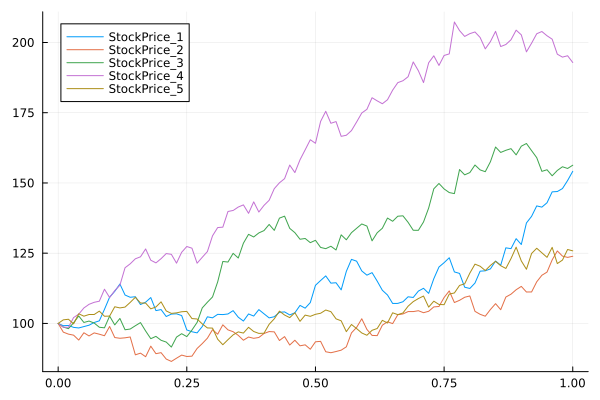

In [14]:
using Distributions
using StatsPlots

#n個の株価をプロット
function SimulateMultiStockPrice(n)
    #1.定数の設定
    T = 1
    Δt = 0.01
    μ = 0.5
    σ = 0.2
    S0 = 100.0#初期株価

    #2.時間の生成
    t = 0:Δt:T

    #3.正規分布を生成
    d = Normal(0, Δt^0.5)

    p = plot() #プロットする枠を確保

    for i in 1:n
        #4.時間ごとに株価を生成
        S = [S0]
        for t_i in t[2:end]
            constantDiff = μ * Δt * S[end] #確定的な変動
            w = rand(d) #乱数生成
            randomDiff = σ * w * S[end] #ランダムな変動
            nextS = S[end] + constantDiff  + randomDiff #次の株価を計算
            push!(S, nextS) #次の株価を配列に格納
        end

        #5.プロット
        plot!(p, t, S, label = "StockPrice_" * string(i))
    end

    plot(p)
end

SimulateMultiStockPrice(5)